# 1.1 Image processing and manipulation with OpenCV

In [1]:
!pip install opencv-python

In [2]:
!wget https://www.birzeit.edu/sites/default/files/buildings.jpg

--2024-04-17 13:07:52--  https://www.birzeit.edu/sites/default/files/buildings.jpg
Resolving www.birzeit.edu (www.birzeit.edu)... 104.22.9.107, 104.22.8.107, 172.67.38.181, ...
Connecting to www.birzeit.edu (www.birzeit.edu)|104.22.9.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258627 (253K) [image/jpeg]
Saving to: ‘buildings.jpg’

buildings.jpg       100%[===================>] 252.57K   366KB/s    in 0.7s    

2024-04-17 13:07:55 (366 KB/s) - ‘buildings.jpg’ saved [258627/258627]



## Loading and displaying an image

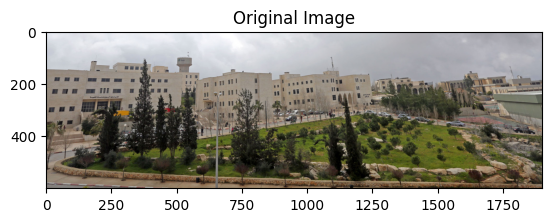

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load an image
image = cv.imread('buildings.jpg')

# Display the image
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

Task 1: What is the shape of the loaded image? What does each dimension represent?

- H; 600
- W; 1900
- Channels; 3 (RGB)

In [4]:
image.shape

(600, 1900, 3)

Task 2: repeat the previous code but now pass the image directly to plt.imshow(). I.e., without using cv.cvtColor(). Do you notice any difference? Why?

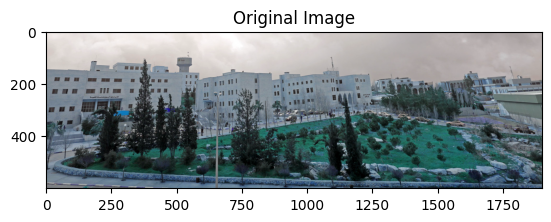

In [5]:
plt.imshow(image)
plt.title('Original Image')
plt.show()

plt.imshow() assumes that the color channels are in the order of (RGB). If the image is originally in a different color space (such as BGR, which is the default in OpenCV), the colors may appear swapped or distorted.

## Grayscale conversion

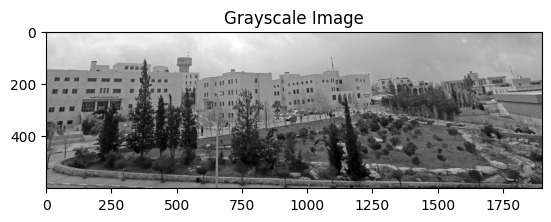

In [6]:
# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

Task 3: What is the shape of the gray image? What does each dimension represent?

- H; 600
- W; 1900
- Channels; disappeared, since there are one channel.

In [7]:
gray_image.shape

(600, 1900)

## Image transformation

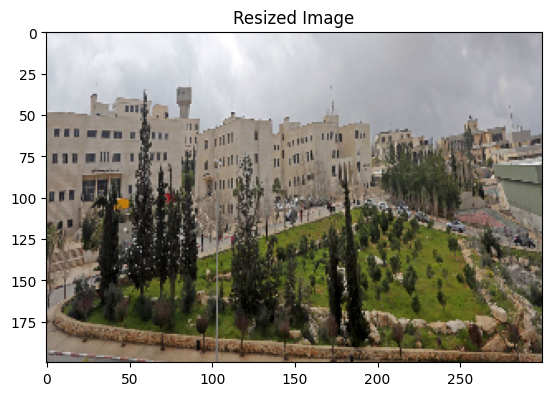

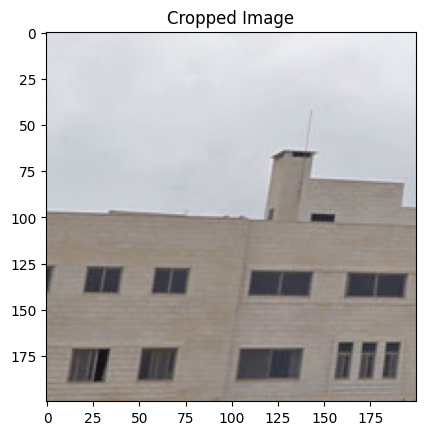

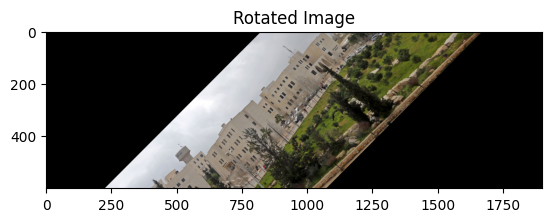

In [8]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# Resize and crop the image
resized_image = cv.resize(image, (300, 200))
cropped_image = image[50:250, 50:250]

# Rotate the image
rows, cols = image.shape[:2]

M = cv.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
rotated_image = cv.warpAffine(image, M, (cols, rows))

# Display the transformed images
plt.imshow(resized_image)
plt.title('Resized Image')
plt.show()

plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.show()

plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.show()

Task 4: Rotate the original image by 10 degrees counter-clockwise around the upperleft corner of the image.

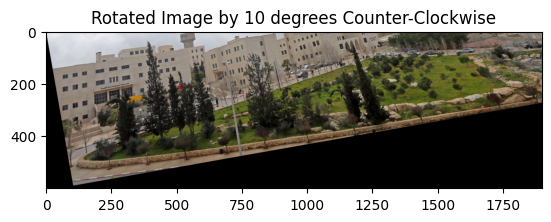

In [9]:
M_t = cv.getRotationMatrix2D((0, 0), 10, 1)

rotated_image_t = cv.warpAffine(image, M_t, (cols, rows))

plt.imshow(rotated_image_t)
plt.title('Rotated Image by 10 degrees Counter-Clockwise')
plt.show()

## Gaussian blurring

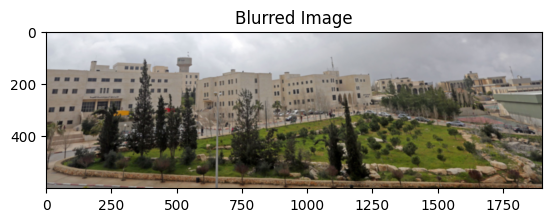

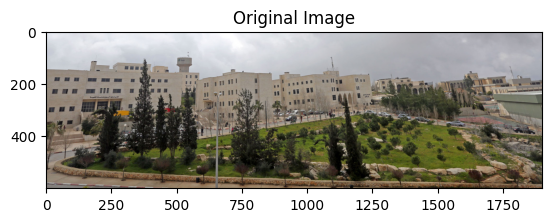

In [10]:
# Apply Gaussian blur
blurred_image = cv.GaussianBlur(image, (7, 7), 0)

# Display the result
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.show()

plt.imshow(image)
plt.title('Original Image')
plt.show()

Task 5: What does (7, 7) in the previous code represent? try to increase this value, what do you notice?

- The tuple (7, 7) represents the size of the Gaussian kernel used for the blur operation.

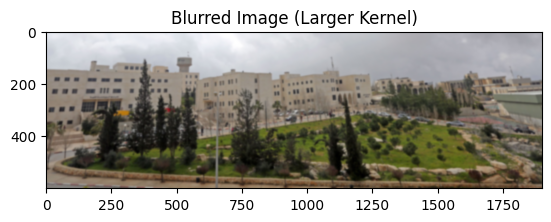

In [11]:
# Apply Gaussian blur with a larger kernel size (e.g., 15x15)
blurred_image_large_kernel = cv.GaussianBlur(image, (15, 15), 0)

# Display the result
plt.imshow(blurred_image_large_kernel)
plt.title('Blurred Image (Larger Kernel)')
plt.show()

## Edge detection

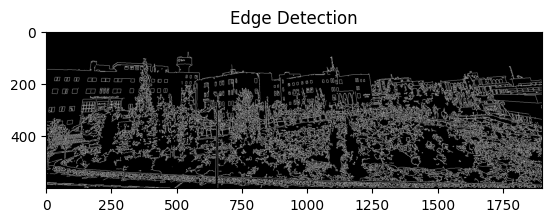

In [12]:
# Perform edge detection using Canny
edges = cv.Canny(gray_image, 50, 150)

# Display the result
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()


Task 6: Explain the parameters of cv.Canny(). How do they affect the results?

- Image: This is the input image on which the edge detection will be performed. It should be a single-channel (grayscale) image.

- Threshold1: This parameter represents the lower threshold for the hysteresis procedure.

- Threshold2: This parameter represents the higher threshold for the hysteresis procedure.

Lower Threshold (Threshold1): This is the minimum intensity gradient required for a pixel to be considered an edge. A lower value will result in more edges being detected, including weaker edges.

Higher Threshold (Threshold2): This threshold is used to link strong edges together. A higher value will result in longer continuous edges, as weaker edges that are not well-connected to strong edges will be eliminated.

# 1.2 Image Classification / Object Recognition

## 1.2.1 Image classification with MLP

### Loading images

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
  [transforms.ToTensor(),
  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:10<00:00, 15672568.43it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


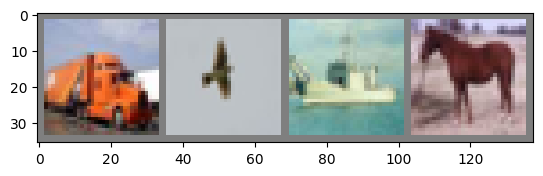

truck bird  ship  horse


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Task 7: Explain the effect of the following transforms transforms.ToTensor(), and transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)).
- **transforms.ToTensor()**
 * This transform converts the input image, which is in the form of a PIL Image or a NumPy array with values in the range [0, 255], into a PyTorch tensor.
 * The transformation scales the pixel values to the range [0, 1]. It does so by dividing each pixel value by 255, making the image data suitable for processing by neural networks.
- **transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))**
 * This transform normalizes the tensor by subtracting the mean and dividing by the standard deviation along each channel.
 * The first tuple (0.5, 0.5, 0.5) represents the mean for each channel (R, G, B), and the second tuple (0.5, 0.5, 0.5) represents the standard deviation for each channel.
 * The normalization is applied channel-wise, so for each channel, the mean is subtracted, and the result is divided by the standard deviation.
 * The purpose of this normalization is to center the data around zero and scale it to have a standard deviation of 1, which helps in training neural networks more effectively.

Task 8: What is the purpose of the following line: np.transpose(npimg, (1, 2, 0))?

**Answer:** The line np.transpose(npimg, (1, 2, 0)) is used to change the order of dimensions in the NumPy array npimg. The purpose of this operation is to convert the tensor image from the PyTorch format (channels, height, width) to the format expected by matplotlib (height, width, channels) when displaying images.

### Defining the network


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(3072, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    # apply the first layer with relu activation
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)
net.to(device)

cuda:0


Net(
  (fc1): Linear(in_features=3072, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

### Define a Loss function and optimizer

In [16]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the network

In [17]:
net.train()
for epoch in range(2): # loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(torch.flatten(inputs,1))
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.929
[1,  4000] loss: 1.743
[1,  6000] loss: 1.687
[1,  8000] loss: 1.647
[1, 10000] loss: 1.612
[1, 12000] loss: 1.587
[2,  2000] loss: 1.525
[2,  4000] loss: 1.505
[2,  6000] loss: 1.512
[2,  8000] loss: 1.474
[2, 10000] loss: 1.489
[2, 12000] loss: 1.476
Finished Training


### Test the network on the test data

In [18]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
net.eval()

with torch.no_grad():
  for data in testloader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    # calculate outputs by running images through the network
    outputs = net(torch.flatten(images,1))
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 48 %


Task 9: For the first layer in the MLP (self.fc1 = nn.Linear(3072, 64)), what does the number 3072 represent?

- Answer: number of input features.

## 1.2.2 Image classification with CNNs

In [19]:
import torch.nn as nn
import torch.nn.functional as F

class NetCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1) # flatten all dimensions except batch
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x

net = NetCNN()
net = net.to(device)

Task 10: Study the CNN code and answer the following questions:
- How many layers does the network have?
 * 5.
- What does the parameters of nn.Conv2d represent?
 * nn.Conv2d(in_channels, out_channels, kernel_size, ...):
   * in_channels: Number of input channels (e.g., 3 for RGB images)
   * out_channels: Number of output channels (feature maps)
   * kernel_size: Size of the convolutional kernel (filter)
- What does the parameters of nn.MaxPool2d represent?
 * nn.MaxPool2d(kernel_size, stride, ...):
   * kernel_size: Size of the pooling window
   * stride: The step size between successive pooling operations.
- In the first linear layer, what does the number 16 * 5 * 5 represent? How to obtain this number?
 * In the first linear layer (fc1), the input size is calculated based on the dimensions of the output of the last convolutional layer (conv2). The 16 * 5 * 5 corresponds to:
   * 16: The number of output channels from the last convolutional layer (conv2).
   * 5 * 5: The spatial dimensions of the feature map produced by the last convolutional layer (conv2).

In [20]:
from torchvision import datasets, models

net = models.alexnet(weights='IMAGENET1K_V1')
net.classifier[6] = nn.Linear(4096, 10)
net = net.to(device)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:05<00:00, 43.4MB/s]


### Loading images

In [21]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.Resize(256),
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


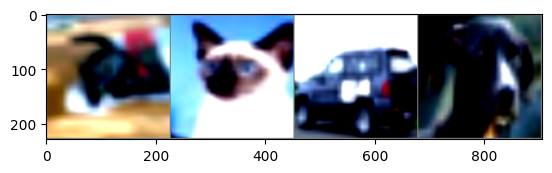

cat   cat   car   dog  


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Define a Loss function and optimizer

In [23]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Train the network

In [24]:
net.train()
for epoch in range(2): # loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.425
[1,  4000] loss: 1.075
[1,  6000] loss: 0.944
[1,  8000] loss: 0.853
[1, 10000] loss: 0.833
[1, 12000] loss: 0.791
[2,  2000] loss: 0.689
[2,  4000] loss: 0.651
[2,  6000] loss: 0.681
[2,  8000] loss: 0.651
[2, 10000] loss: 0.650
[2, 12000] loss: 0.631
Finished Training


### Test the network on the test data

In [25]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
net.eval()

with torch.no_grad():
  for data in testloader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    # calculate outputs by running images through the network
    outputs = net(images)
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 79 %


In [26]:
from torchvision import datasets, models

net = models.alexnet()
net.classifier[6] = nn.Linear(4096, 10)
net = net.to(device)

In [27]:
net.train()
for epoch in range(2): # loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    inputs = inputs.to(device)
    labels = labels.to(device)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.302
[1,  6000] loss: 2.303
[1,  8000] loss: 2.303
[1, 10000] loss: 2.303
[1, 12000] loss: 2.303
[2,  2000] loss: 2.303
[2,  4000] loss: 2.302
[2,  6000] loss: 2.303
[2,  8000] loss: 2.303
[2, 10000] loss: 2.303
[2, 12000] loss: 2.303
Finished Training


In [28]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
net.eval()

with torch.no_grad():
  for data in testloader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    # calculate outputs by running images through the network
    outputs = net(images)
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 9 %
